In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

# Define the time period
start = '2009-12-31'
end = '2020-01-01'

# Fetch data
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows
print(df.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-12-31  7.611786  7.619643  7.520000  7.526071   6.355581  352410800
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465666  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362820  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351056  477131200


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.974503,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.342972,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.316292,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,70.733612,144114400
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.250435,100805600


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.355581,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


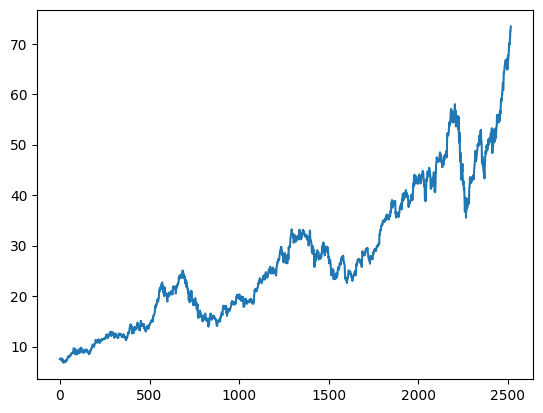

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200
...,...,...,...,...,...
2512,71.172501,71.222504,70.730003,71.067497,48478800
2513,71.205002,72.495003,71.175003,72.477501,93121200
2514,72.779999,73.492500,72.029999,72.449997,146266000
2515,72.364998,73.172501,71.305000,72.879997,144114400


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

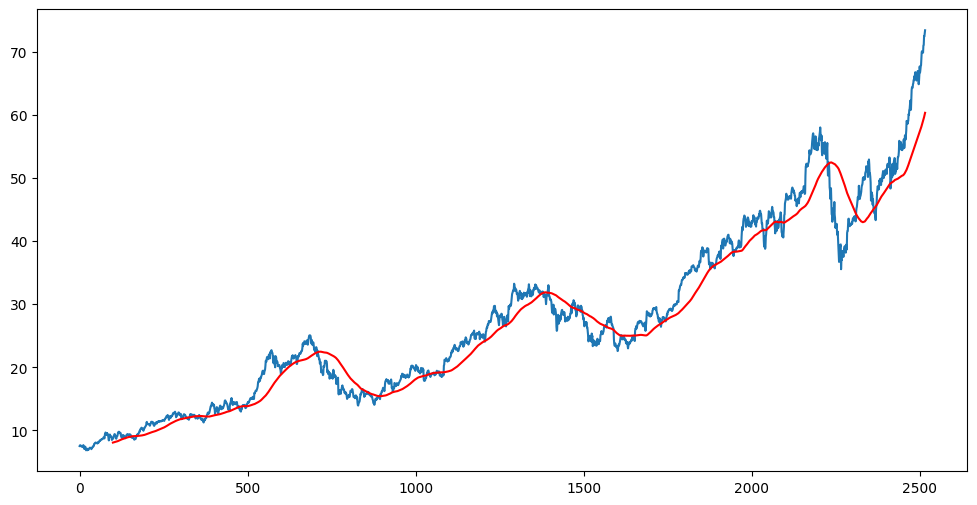

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

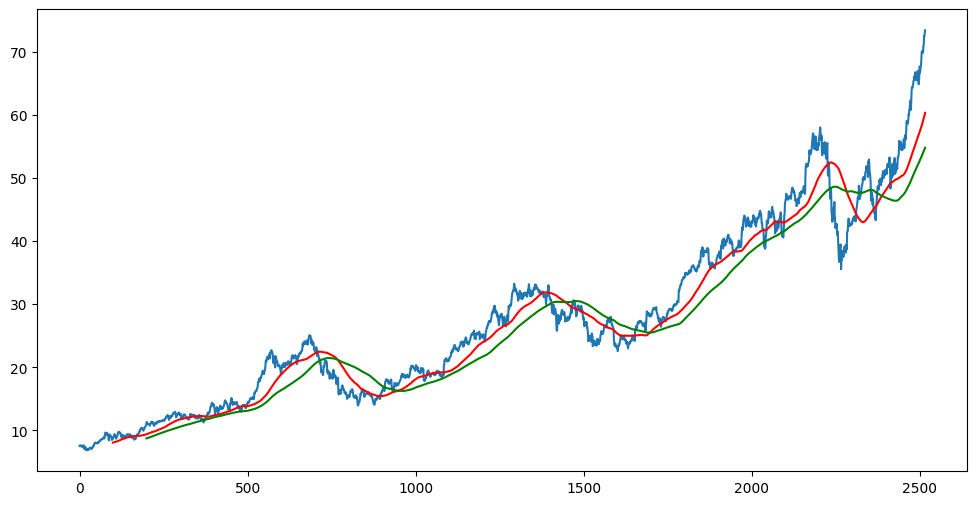

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(2517, 5)

In [13]:

# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(756, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
data_training_array.shape

(1761, 1)

In [19]:
# Initialize x_train and y_train as lists
x_train = []
y_train = []

# Loop through data and append to lists
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])  # Append sliding window of 100 values
    y_train.append(data_training_array[i, 0])     # Append the target value (next value)


x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
#ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - loss: 0.1369
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 201ms/step - loss: 0.0165
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - loss: 0.0111
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 0.0107
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 215ms/step - loss: 0.0096
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - loss: 0.0093
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 236ms/step - loss: 0.0082
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - loss: 0.0076
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 0.0071
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0072
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 228ms/step - loss: 0.0068
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0068
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step - loss: 0.0060
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - loss: 0.0059
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [26]:
data_training.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [27]:
past_100_days = data_training.tail(100) 

In [28]:
import pandas as pd

# Assuming past_100_days and data_testing are both DataFrames
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

# Display the first few rows of the concatenated DataFrame
final_df.head()


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [29]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [30]:
input_data.shape

(856, 1)

In [31]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [32]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [33]:
#Making predictions
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step


In [34]:
y_predicted.shape

(756, 1)

In [35]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [36]:
y_predicted

array([[0.15674329],
       [0.15775436],
       [0.15864983],
       [0.15940987],
       [0.16002753],
       [0.16051318],
       [0.16090399],
       [0.16125832],
       [0.16163255],
       [0.16207388],
       [0.16260608],
       [0.16322686],
       [0.16392925],
       [0.16470133],
       [0.16552052],
       [0.16636166],
       [0.16720113],
       [0.1680159 ],
       [0.16881007],
       [0.1695999 ],
       [0.17039724],
       [0.17120233],
       [0.17200294],
       [0.17287798],
       [0.1739274 ],
       [0.17522185],
       [0.17679562],
       [0.17866996],
       [0.18084411],
       [0.18328731],
       [0.18593751],
       [0.1887281 ],
       [0.19161251],
       [0.19455379],
       [0.19748497],
       [0.20037378],
       [0.20319794],
       [0.20594297],
       [0.20858577],
       [0.21110135],
       [0.21347085],
       [0.2156811 ],
       [0.21776196],
       [0.21974139],
       [0.22164126],
       [0.22348055],
       [0.2252669 ],
       [0.226

In [37]:
scaler.scale_

array([0.02099517])

In [38]:
# Scale factor
scale_factor = 1 / 0.02099517

# Multiply by scale factor
y_predicted = y_predicted * scale_factor

y_test = y_test * scale_factor



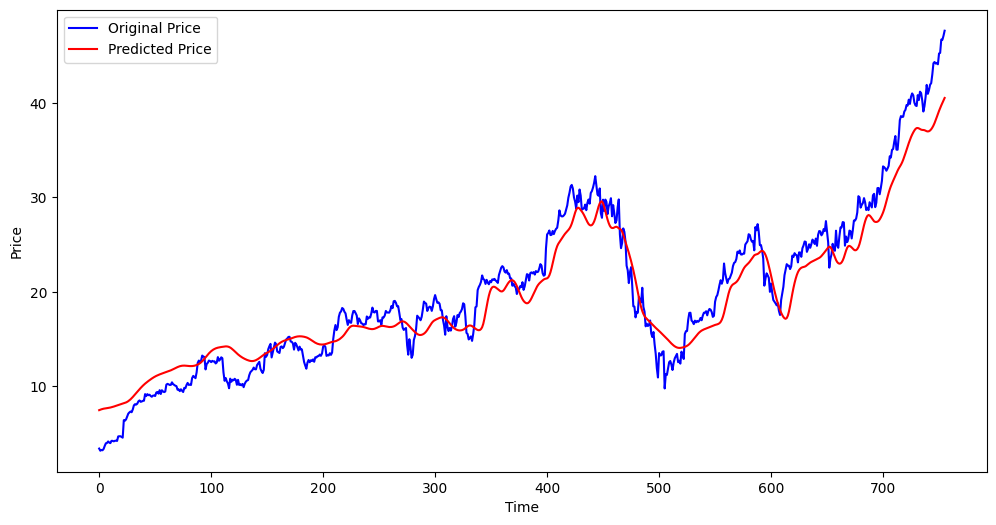

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()